# RMNpy Dimension Classes Tutorial

## Introduction

RMNpy provides Python access to comprehensive dimension classes for representing multidimensional data. These classes are part of RMNpy's Python wrapper around the RMNLib C++ library, making them accessible for Python workflows.

This tutorial demonstrates the three main dimension types available through RMNpy:

1. **LinearDimension** - Uniformly sampled dimensions with constant increments
2. **MonotonicDimension** - Non-uniformly sampled dimensions with custom coordinate arrays  
3. **LabeledDimension** - Categorical dimensions with text labels

**Note:** SIDimension serves as the base class for quantitative dimensions and is automatically used for reciprocal dimensions in LinearDimension and MonotonicDimension. 

## Setup and Imports

RMNpy dimension classes provide both coordinate management and metadata handling for spectroscopic datasets through Python. We'll explore each class systematically, starting with basic concepts and progressing to advanced features.

In [1]:
# Import RMNpy dimension classes
try:
    from rmnpy.rmnlib import (
        LinearDimension, 
        MonotonicDimension,
        LabeledDimension,
        SIDimension
    )
    print('✓ RMNpy dimension classes imported successfully')
    print('Available dimension types:')
    print('  - LinearDimension: Uniform sampling with constant increments')
    print('  - MonotonicDimension: Non-uniform sampling with custom coordinates')
    print('  - LabeledDimension: Categorical dimensions with text labels')
    print('  - SIDimension: Physical dimensions with SI units')
except ImportError as e:
    print(f'Error importing RMNpy: {e}')
    print('Please ensure RMNpy is properly installed')

# Import supporting libraries for visualization
try:
    import numpy as np
    print('✓ NumPy imported')
except ImportError:
    print('NumPy not available - some examples may not work')

try:
    import matplotlib.pyplot as plt
    print('✓ Matplotlib imported')
except ImportError:
    print('Matplotlib not available - plotting examples will be skipped')

✓ RMNpy dimension classes imported successfully
Available dimension types:
  - LinearDimension: Uniform sampling with constant increments
  - MonotonicDimension: Non-uniform sampling with custom coordinates
  - LabeledDimension: Categorical dimensions with text labels
  - SIDimension: Physical dimensions with SI units
✓ NumPy imported
✓ Matplotlib imported


## 1. LinearDimension - Uniform Sampling

LinearDimension represents uniformly sampled dimensions where coordinates are generated using:
```
coordinates[i] = coordinates_offset + i * increment
```

This is the most common dimension type for frequency-domain NMR data and other uniformly sampled measurements.

**Required Parameters:**
- `count` (int): Number of coordinates, must be ≥2
- `increment` (str or Scalar): Increment between coordinates (e.g., '1.0 Hz')

**Optional Parameters:**
- `label`, `description`, `application`: Metadata
- `coordinates_offset`, `origin_offset`: Offset values
- `quantity_name`: Physical quantity name
- `period`: For periodic dimensions
- `scaling`: Dimension scaling type
- `complex_fft`: For FFT dimensions
- `reciprocal`: Reciprocal dimension

### 1.1 Creating Linear Dimensions

In [2]:
# Create a basic linear dimension
try:
    # LinearDimension requires count (≥2) and increment (required)
    # label and description are optional - the C API allows NULL values
    linear_dim = LinearDimension(count=10, increment='1.0 Hz')
    
    print('Linear Dimension Created:')
    print(f'Count: {linear_dim.count}')
    print(f'Type: {linear_dim.type}')
    print(f'Increment: {linear_dim.increment}')
    print(f'Label: "{linear_dim.label}"')  # Will be empty string if not provided
    print(f'Description: "{linear_dim.description}"')  # Will be empty string if not provided
    
    # Access coordinates
    try:
        coords = linear_dim.coordinates
        print(f'\nCoordinates (first 5): {coords[:5]}')
        print(f'Coordinates shape: {coords.shape}')
    except Exception as e:
        print(f'Error accessing coordinates: {e}')
    
except Exception as e:
    print(f'Error creating LinearDimension: {e}')
    print('Note: LinearDimension requires count (≥2) and increment parameters')

Linear Dimension Created:
Count: 10
Type: linear
Increment: 1 Hz
Label: ""
Description: ""

Coordinates (first 5): [0. 1. 2. 3. 4.]
Coordinates shape: (10,)


### 1.2 Exploring LinearDimension Properties

Let's explore what properties and methods are actually available:

In [3]:
# Explore LinearDimension with different parameters and automatic reciprocal
try:
    # Create with metadata and offset (no reciprocal specified)
    linear_dim2 = LinearDimension(
        count=8,
        increment='2.5 Hz',
        label='Frequency',
        description='Test frequency dimension',
        coordinates_offset='100.0 Hz'
    )
    
    print('LinearDimension with metadata:')
    print(f'Count: {linear_dim2.count}')
    print(f'Type: {linear_dim2.type}')
    print(f'Increment: {linear_dim2.increment}')
    print(f'Label: {linear_dim2.label}')
    print(f'Description: {linear_dim2.description}')
    print(f'Coordinates offset: {linear_dim2.coordinates_offset}')
    
    # Show the automatically created reciprocal SIDimension
    print('\nDefault Reciprocal SIDimension:')
    try:
        reciprocal = linear_dim2.reciprocal
        print(f'  Reciprocal type: {reciprocal.type}')
        print(f'  Reciprocal label: {reciprocal.label}')
        print(f'  Reciprocal description: {reciprocal.description}')
        print(f'  Reciprocal quantity: {reciprocal.quantity_name}')
        print(f'  Reciprocal coordinates offset: {reciprocal.coordinates_offset}')
        print(f'  Reciprocal origin offset: {reciprocal.origin_offset}')
        print(f'  Reciprocal periodic: {reciprocal.periodic}')
        
        # Show some coordinates from linear dimension only
        # Note: SIDimension (reciprocal) doesn't have coordinate arrays
        linear_coords = linear_dim2.coordinates
        print(f'\nLinear coordinates (first 3): {linear_coords[:3]}')
        
    except Exception as e:
        print(f'  Error accessing reciprocal: {e}')
    
    # Check other available properties
    print('\nOther LinearDimension properties:')
    properties = ['origin_offset', 'period', 'quantity_name',
                 'periodic', 'scaling', 'complex_fft']
    
    for prop in properties:
        if hasattr(linear_dim2, prop):
            try:
                value = getattr(linear_dim2, prop)
                print(f'  {prop}: {value}')
            except Exception as e:
                print(f'  {prop}: <error accessing: {e}>')
        
except Exception as e:
    print(f'Error exploring LinearDimension: {e}')

LinearDimension with metadata:
Count: 8
Type: linear
Increment: 2.5 Hz
Label: Frequency
Description: Test frequency dimension
Coordinates offset: 100 Hz

Default Reciprocal SIDimension:
  Reciprocal type: si_dimension
  Reciprocal label: 
  Reciprocal description: 
  Reciprocal quantity: time
  Reciprocal coordinates offset: 0 ys
  Reciprocal origin offset: 0 ys
  Reciprocal periodic: False

Linear coordinates (first 3): [100.  102.5 105. ]

Other LinearDimension properties:
  origin_offset: 0 Hz
  period: inf
  quantity_name: frequency
  periodic: False
  scaling: 0
  complex_fft: False


## 2. MonotonicDimension - Non-Uniform Sampling

MonotonicDimension handles non-uniformly sampled data where coordinates are explicitly specified. This is essential for:
- Non-uniform sampling (NUS) NMR experiments
- Logarithmic or custom sampling schemes
- Irregular time or frequency grids

**Required Parameters:**
- `coordinates` (list): Array of coordinate values, must have ≥2 elements

**Optional Parameters:**
- `label`, `description`, `application`: Metadata
- `coordinates_offset`, `origin_offset`: Offset values
- `quantity_name`: Physical quantity name
- `period`: For periodic dimensions
- `scaling`: Dimension scaling type
- `reciprocal`: Reciprocal dimension

### 2.1 Creating Monotonic Dimensions

In [4]:
# Create a basic monotonic dimension and explore its reciprocal
try:
    # MonotonicDimension requires coordinates array (≥2 elements)
    coords_array = [1.0, 2.5, 4.0, 8.0, 16.0]
    
    monotonic_dim = MonotonicDimension(
        coordinates=coords_array,
        label='Time',
        description='Non-uniform time sampling'
    )
    
    print('MonotonicDimension Created:')
    print(f'Count: {monotonic_dim.count}')
    print(f'Type: {monotonic_dim.type}')
    print(f'Label: {monotonic_dim.label}')
    print(f'Description: {monotonic_dim.description}')
    
    # Access coordinates
    try:
        coords = monotonic_dim.coordinates
        print(f'\nInput coordinates: {coords_array}')
        print(f'Retrieved coordinates: {coords}')
        print(f'Coordinates shape: {coords.shape}')
    except Exception as e:
        print(f'Error accessing coordinates: {e}')
    
    # Show the automatically created reciprocal SIDimension
    print('\nDefault Reciprocal SIDimension:')
    try:
        reciprocal = monotonic_dim.reciprocal
        print(f'  Reciprocal type: {reciprocal.type}')
        print(f'  Reciprocal count: {reciprocal.count}')
        print(f'  Reciprocal label: {reciprocal.label}')
        print(f'  Reciprocal description: {reciprocal.description}')
        print(f'  Reciprocal quantity: {reciprocal.quantity_name}')
        print(f'  Reciprocal coordinates offset: {reciprocal.coordinates_offset}')
        print(f'  Reciprocal origin offset: {reciprocal.origin_offset}')
        print(f'  Reciprocal periodic: {reciprocal.periodic}')
        
        # Show coordinates from monotonic dimension only
        # Note: SIDimension (reciprocal) doesn't have coordinate arrays
        monotonic_coords = monotonic_dim.coordinates
        print(f'\nMonotonic coordinates (first 3): {monotonic_coords[:3]}')
        print(f'Note: SIDimension reciprocal has offset properties but no coordinate arrays')
        
    except Exception as e:
        print(f'  Error accessing reciprocal: {e}')
    
    # Check other available properties
    print('\nOther MonotonicDimension properties:')
    properties = ['coordinates_offset', 'origin_offset', 'period', 'quantity_name',
                 'periodic', 'scaling']
    
    for prop in properties:
        if hasattr(monotonic_dim, prop):
            try:
                value = getattr(monotonic_dim, prop)
                print(f'  {prop}: {value}')
            except Exception as e:
                print(f'  {prop}: <error: {e}>')
    
except Exception as e:
    print(f'Error creating MonotonicDimension: {e}')
    print('Note: MonotonicDimension requires coordinates parameter with ≥2 elements')

MonotonicDimension Created:
Count: 5
Type: monotonic
Label: Time
Description: Non-uniform time sampling

Input coordinates: [1.0, 2.5, 4.0, 8.0, 16.0]
Retrieved coordinates: [ 1.   2.5  4.   8.  16. ]
Coordinates shape: (5,)

Default Reciprocal SIDimension:
  Reciprocal type: si_dimension
  Reciprocal count: 1
  Reciprocal label: 
  Reciprocal description: 
  Reciprocal quantity: dimensionless
  Reciprocal coordinates offset: 0
  Reciprocal origin offset: 0
  Reciprocal periodic: False

Monotonic coordinates (first 3): [1.  2.5 4. ]
Note: SIDimension reciprocal has offset properties but no coordinate arrays

Other MonotonicDimension properties:
  coordinates_offset: 0
  origin_offset: 0
  period: inf
  quantity_name: dimensionless
  periodic: False
  scaling: 0


### 2.2 Exploring MonotonicDimension Properties

Let's see what functionality is available for non-uniform sampling:

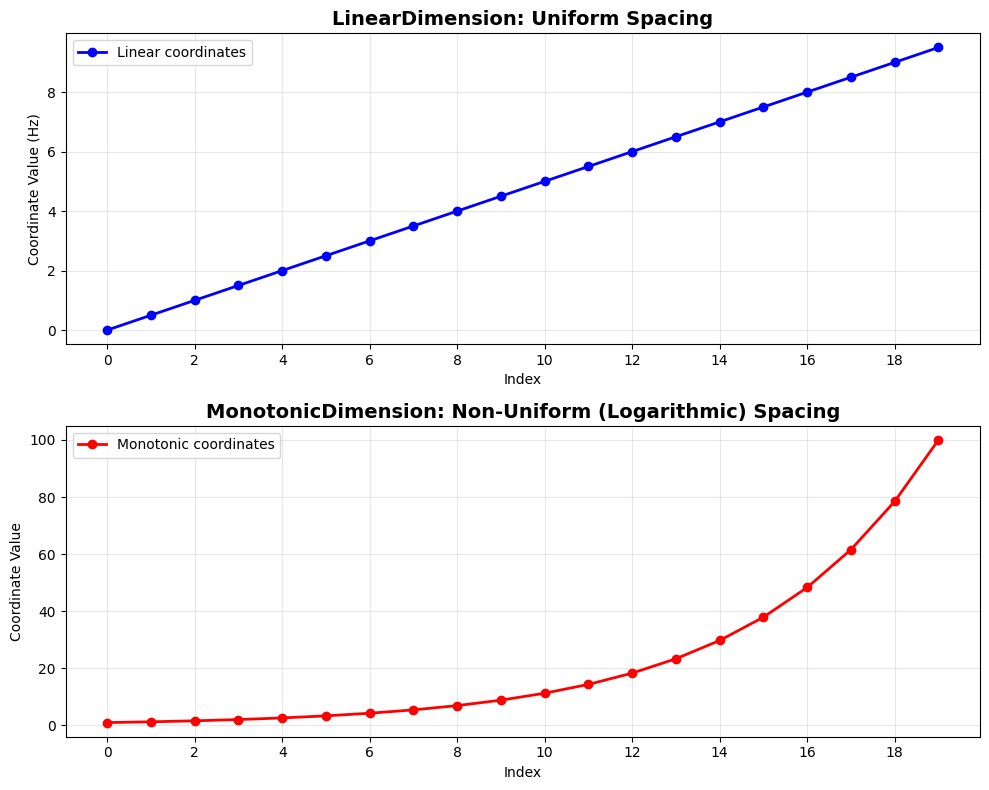


=== Coordinate Analysis ===
LinearDimension (Linear Frequency):
  Count: 20
  Range: 0.00 to 9.50 Hz
  Increment: 0.5 Hz
  Spacing: Uniform

MonotonicDimension (Log Time):
  Count: 20
  Range: 1.00 to 100.00
  First increment: 0.27
  Last increment: 21.52
  Spacing: Non-uniform (logarithmic)

Spacing Statistics:
  Linear - All increments equal: True
  Linear - Standard deviation: 0.000000
  Monotonic - Standard deviation: 6.03


In [5]:
# Visualizing Coordinate Differences: Linear vs Monotonic
import matplotlib.pyplot as plt
import numpy as np

try:
    # Create example dimensions for comparison
    linear_example = LinearDimension(count=20, increment='0.5 Hz', label='Linear Frequency')
    monotonic_example = MonotonicDimension(
        coordinates=np.logspace(0, 2, 20),  # Logarithmic spacing from 1 to 100
        label='Log Time'
    )
    
    # Get coordinates
    linear_coords = linear_example.coordinates
    monotonic_coords = monotonic_example.coordinates
    
    # Create indices for x-axis
    linear_indices = np.arange(len(linear_coords))
    monotonic_indices = np.arange(len(monotonic_coords))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot LinearDimension
    ax1.plot(linear_indices, linear_coords, 'bo-', linewidth=2, markersize=6, label='Linear coordinates')
    ax1.set_title('LinearDimension: Uniform Spacing', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Coordinate Value (Hz)')
    ax1.set_xticks(range(0, len(linear_coords), max(1, len(linear_coords)//10)))
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot MonotonicDimension
    ax2.plot(monotonic_indices, monotonic_coords, 'ro-', linewidth=2, markersize=6, label='Monotonic coordinates')
    ax2.set_title('MonotonicDimension: Non-Uniform (Logarithmic) Spacing', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Coordinate Value')
    ax2.set_xticks(range(0, len(monotonic_coords), max(1, len(monotonic_coords)//10)))
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Calculate increments for summary statistics
    diff1 = monotonic_coords[1] - monotonic_coords[0]
    diff2 = monotonic_coords[-1] - monotonic_coords[-2]
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print('\n=== Coordinate Analysis ===')
    print(f'LinearDimension ({linear_example.label}):')
    print(f'  Count: {linear_example.count}')
    print(f'  Range: {linear_coords[0]:.2f} to {linear_coords[-1]:.2f} Hz')
    print(f'  Increment: {linear_example.increment}')
    print(f'  Spacing: Uniform')
    
    print(f'\nMonotonicDimension ({monotonic_example.label}):')
    print(f'  Count: {monotonic_example.count}')
    print(f'  Range: {monotonic_coords[0]:.2f} to {monotonic_coords[-1]:.2f}')
    print(f'  First increment: {diff1:.2f}')
    print(f'  Last increment: {diff2:.2f}')
    print(f'  Spacing: Non-uniform (logarithmic)')
    
    # Calculate and show spacing differences
    linear_diffs = np.diff(linear_coords)
    monotonic_diffs = np.diff(monotonic_coords)
    
    print(f'\nSpacing Statistics:')
    print(f'  Linear - All increments equal: {np.allclose(linear_diffs, linear_diffs[0])}')
    print(f'  Linear - Standard deviation: {np.std(linear_diffs):.6f}')
    print(f'  Monotonic - Standard deviation: {np.std(monotonic_diffs):.2f}')
    
except Exception as e:
    print(f'Error creating visualization: {e}')
    print('Make sure matplotlib is available for plotting')

## 3. LabeledDimension - Categorical Data

LabeledDimension handles categorical or discrete data where coordinates are text labels rather than numerical values. This is useful for:
- Sample names in metabolomics studies
- Experimental conditions
- Categorical variables in analysis

**Required Parameters:**
- `labels` (list): List of string labels, must have ≥2 elements

**Optional Parameters:**
- `label`, `description`, `application`: Metadata

### 3.1 Creating Labeled Dimensions

In [6]:
# Create a basic labeled dimension
try:
    # LabeledDimension requires labels array (≥2 elements required by C API)
    labels_array = ['Control', 'Treatment_A', 'Treatment_B', 'Recovery']
    
    labeled_dim = LabeledDimension(
        labels=labels_array,
        label='Condition',
        description='Experimental conditions'
    )
    
    print('LabeledDimension Created:')
    print(f'Count: {labeled_dim.count}')
    print(f'Type: {labeled_dim.type}')
    print(f'Label: {labeled_dim.label}')
    print(f'Description: {labeled_dim.description}')
    print(f'Is quantitative: {labeled_dim.is_quantitative()}')
    
    # Access labels
    try:
        labels = labeled_dim.labels
        print(f'\nInput labels: {labels_array}')
        print(f'Retrieved labels: {labels}')
        
        # Also try coordinate_labels property
        coord_labels = labeled_dim.coordinate_labels
        print(f'Coordinate labels: {coord_labels}')
    except Exception as e:
        print(f'Error accessing labels: {e}')
    
    # Access coordinates (should return the labels for LabeledDimension)
    try:
        coords = labeled_dim.coordinates
        print(f'Coordinates: {coords}')
    except Exception as e:
        print(f'Error accessing coordinates: {e}')
    
except Exception as e:
    print(f'Error creating LabeledDimension: {e}')
    print('Note: LabeledDimension requires labels parameter with ≥2 string elements')

LabeledDimension Created:
Count: 4
Type: labeled
Label: Condition
Description: Experimental conditions
Is quantitative: False

Input labels: ['Control', 'Treatment_A', 'Treatment_B', 'Recovery']
Retrieved labels: ['Control' 'Treatment_A' 'Treatment_B' 'Recovery']
Coordinate labels: ['Control' 'Treatment_A' 'Treatment_B' 'Recovery']
Coordinates: ['Control' 'Treatment_A' 'Treatment_B' 'Recovery']


### 3.2 Basic Functionality Testing

Let's verify what works with the actual RMNpy implementation:

## 4. Testing All Dimension Types

### 4.1 Basic Creation and Property Testing

Let's create one instance of each dimension type and see what actually works:

In [7]:
# Test creation of all dimension types with proper parameters
print('Creating All Dimension Types:')
print('=' * 40)

dimensions = {}

# LinearDimension: requires count (≥2) and increment
try:
    dimensions['linear'] = LinearDimension(
        count=10, 
        increment='5.0 Hz',
        label='Frequency',
        description='Linear frequency dimension'
    )
    print('✓ Created LinearDimension with 10 points, 5.0 Hz increment')
except Exception as e:
    print(f'✗ LinearDimension failed: {e}')

# MonotonicDimension: requires coordinates array (≥2 elements)
try:
    dimensions['monotonic'] = MonotonicDimension(
        coordinates=[1.0, 3.0, 7.0, 15.0, 31.0],
        label='Time',
        description='Non-uniform time sampling'
    )
    print('✓ Created MonotonicDimension with 5 coordinate points')
except Exception as e:
    print(f'✗ MonotonicDimension failed: {e}')

# LabeledDimension: requires labels array (≥2 elements)
try:
    dimensions['labeled'] = LabeledDimension(
        labels=['Control', 'Treatment', 'Recovery'],
        label='Condition',
        description='Experimental conditions'
    )
    print('✓ Created LabeledDimension with 3 labels')
except Exception as e:
    print(f'✗ LabeledDimension failed: {e}')

# SIDimension: all parameters optional
try:
    dimensions['si'] = SIDimension(
        label='SI Base',
        description='Base SI dimension',
        quantity_name='time'
    )
    print('✓ Created SIDimension with optional parameters')
except Exception as e:
    print(f'✗ SIDimension failed: {e}')

print(f'\nSuccessfully created {len(dimensions)} dimension types')

# Show properties of each created dimension
for name, dim in dimensions.items():
    print(f'\n{name.upper()} DIMENSION:')
    print(f'  Type: {dim.type}')
    print(f'  Count: {dim.count}')
    print(f'  Label: {dim.label}')
    print(f'  Description: {dim.description}')
    print(f'  Is quantitative: {dim.is_quantitative()}')
    
    # Show type-specific properties
    if name == 'linear':
        try:
            print(f'  Increment: {dim.increment}')
            print(f'  Coordinates offset: {dim.coordinates_offset}')
        except Exception as e:
            print(f'  Error accessing properties: {e}')
    elif name == 'monotonic':
        try:
            coords = dim.coordinates
            print(f'  Coordinates: {coords}')
        except Exception as e:
            print(f'  Error accessing coordinates: {e}')
    elif name == 'labeled':
        try:
            labels = dim.labels
            print(f'  Labels: {labels}')
        except Exception as e:
            print(f'  Error accessing labels: {e}')
    elif name == 'si':
        try:
            print(f'  Quantity name: {dim.quantity_name}')
            print(f'  Periodic: {dim.periodic}')
        except Exception as e:
            print(f'  Error accessing properties: {e}')

Creating All Dimension Types:
✓ Created LinearDimension with 10 points, 5.0 Hz increment
✓ Created MonotonicDimension with 5 coordinate points
✓ Created LabeledDimension with 3 labels
✓ Created SIDimension with optional parameters

Successfully created 4 dimension types

LINEAR DIMENSION:
  Type: linear
  Count: 10
  Label: Frequency
  Description: Linear frequency dimension
  Is quantitative: True
  Increment: 5 Hz
  Coordinates offset: 0 Hz

MONOTONIC DIMENSION:
  Type: monotonic
  Count: 5
  Label: Time
  Description: Non-uniform time sampling
  Is quantitative: True
  Coordinates: [ 1.  3.  7. 15. 31.]

LABELED DIMENSION:
  Type: labeled
  Count: 3
  Label: Condition
  Description: Experimental conditions
  Is quantitative: False
  Labels: ['Control' 'Treatment' 'Recovery']

SI DIMENSION:
  Type: si_dimension
  Count: 1
  Label: SI Base
  Description: Base SI dimension
  Is quantitative: True
  Quantity name: time
  Periodic: False


### 4.2 Method and Property Discovery

Let's systematically check what methods and properties are available:

In [8]:
# Safe exploration of dimension class APIs
print('Exploring RMNpy Dimension Class APIs:')
print('=' * 45)

# Test each dimension class if it was created successfully
if 'dimensions' in locals() and len(dimensions) > 0:
    for dim_name, dim_obj in dimensions.items():
        print(f'\n{dim_name.upper()} DIMENSION:')
        print('-' * 20)
        
        # Safe property access - avoid coordinates for SIDimension to prevent errors
        safe_properties = ['type', 'count', 'label', 'description', 'is_quantitative']
        
        # Add type-specific safe properties
        if dim_name == 'linear':
            safe_properties.extend(['increment', 'coordinates_offset', 'origin_offset', 
                                  'complex_fft', 'periodic'])
        elif dim_name == 'monotonic':
            safe_properties.extend(['coordinates_offset', 'origin_offset', 'periodic'])
        elif dim_name == 'labeled':
            safe_properties.extend(['coordinate_labels'])
        elif dim_name == 'si':
            safe_properties.extend(['quantity_name', 'coordinates_offset', 'origin_offset', 
                                  'periodic', 'scaling'])
        
        # Show safe properties
        print('Properties:')
        for prop in safe_properties:
            if hasattr(dim_obj, prop):
                try:
                    if callable(getattr(dim_obj, prop)):
                        value = getattr(dim_obj, prop)()
                    else:
                        value = getattr(dim_obj, prop)
                    print(f'  {prop}: {value}')
                except Exception as e:
                    print(f'  {prop}: <error: {str(e)[:50]}>')
        
        # Show methods safely - avoid getattr on properties that could fail
        print('\nMethods:')
        problematic_attrs = ['absolute_coordinates', 'coordinates', 'coords'] if dim_name == 'si' else []
        
        try:
            all_methods = []
            for attr in dir(dim_obj):
                if not attr.startswith('_') and attr not in problematic_attrs:
                    try:
                        attr_obj = getattr(dim_obj, attr)
                        if callable(attr_obj):
                            all_methods.append(attr)
                    except Exception:
                        # Skip attributes that cause errors when accessed
                        continue
                        
            print(f'Methods ({len(all_methods)} total):')
            for method in all_methods[:5]:
                print(f'  {method}()')
            if len(all_methods) > 5:
                print(f'  ... and {len(all_methods) - 5} more methods')
                
        except Exception as e:
            print(f'Error discovering methods: {e}')
else:
    print('No dimensions were successfully created to explore')

Exploring RMNpy Dimension Class APIs:

LINEAR DIMENSION:
--------------------
Properties:
  type: linear
  count: 10
  label: Frequency
  description: Linear frequency dimension
  is_quantitative: True
  increment: 5 Hz
  coordinates_offset: 0 Hz
  origin_offset: 0 Hz
  complex_fft: False
  periodic: False

Methods:
Methods (5 total):
  axis_label()
  copy()
  dict()
  is_quantitative()
  to_dict()

MONOTONIC DIMENSION:
--------------------
Properties:
  type: monotonic
  count: 5
  label: Time
  description: Non-uniform time sampling
  is_quantitative: True
  coordinates_offset: 0
  origin_offset: 0
  periodic: False

Methods:
Methods (5 total):
  axis_label()
  copy()
  dict()
  is_quantitative()
  to_dict()

LABELED DIMENSION:
--------------------
Properties:
  type: labeled
  count: 3
  label: Condition
  description: Experimental conditions
  is_quantitative: False
  coordinate_labels: ['Control' 'Treatment' 'Recovery']

Methods:
Methods (6 total):
  axis_label()
  copy()
  dict()